<a href="https://colab.research.google.com/github/hodades/LOAN-Prediction/blob/main/Project_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Scoring Classification Project

This project aims to build a model that predicts whether a loan applicant will repay their loan, based on various financial and personal information. We will use Python libraries for data preprocessing, visualization, and model training. The goal is to assess the performance of a classifier and provide recommendations to improve loan decision-making.


## 1. Data Loading and Exploration
We'll load the dataset and quickly explore its structure.

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load dataset
data = pd.read_csv("/content/loan_data.csv")


In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


===> ApplicantIncome et CoapplicantIncome varient beaucoup avec des valeurs maximums respectivement de 81,000 et 41,667, ce qui peut indiquer une forte hétérogénéité parmi les candidats.

==> Le LoanAmount a également une large variation, avec un écart-type relativement élevé (77.42).

==> La Credit_History semble être une variable importante avec des valeurs manquantes à considérer.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [18]:
data.shape

(981, 13)

## 3. Data Cleaning

The dataset contains missing values, which we need to handle. We will also encode categorical variables for model training.

In [19]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


==> Certaines colonnes ont un nombre important de valeurs manquantes, notamment :

Gender : 24 valeurs manquantes

Married : 3 valeurs manquantes

Dependents : 25 valeurs manquantes

Self_Employed : 55 valeurs manquantes

LoanAmount : 27 valeurs manquantes

Loan_Amount_Term : 20 valeurs manquantes

Credit_History : 79 valeurs manquantes

Loan_Status : 367 valeurs manquantes (c'est très significatif)

In [28]:
# Fill missing values for categorical columns
data['Gender'] = data['Gender'].fillna('Male')
data['Married'] = data['Married'].fillna('Yes')
data['Dependents'] = data['Dependents'].fillna('0')
data['Self_Employed'] = data['Self_Employed'].fillna('No')




In [29]:
# Fill missing values for numerical columns with mean
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(360.0)
data['Credit_History'] = data['Credit_History'].fillna(1.0)

In [27]:
# Verify there are no missing values left
data.isnull().sum()


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## 4. Encoding Categorical Variables

We encode the categorical features for model compatibility using `LabelEncoder`.

In [33]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Encode categorical columns
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    data[col] = labelencoder.fit_transform(data[col])

# Encode target variable 'Loan_Status'
data['Loan_Status'] = labelencoder.fit_transform(data['Loan_Status'])


## 5. Feature and Target Selection

We select features (X) and the target variable (y) for model training.

In [34]:
# Features and target
X = data.drop(columns=['Loan_ID', 'Loan_Status']).values
y = data['Loan_Status'].values


##6. Splitting the Data into Training and Test Sets

We split the data into training and test sets with a 67-33 ratio.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


## 7. Feature Scaling
We scale the features using StandardScaler.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 8. Principal Component Analysis (PCA)
We reduce the dimensionality of the data using PCA.

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


## 9. Model Training and Evaluation
9.1 Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred_lr = classifier.predict(X_test)

# Calculate accuracy
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8117
[[  0  61]
 [  0 263]]


9.2 K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred_knn = classifier.predict(X_test)

# Calculate accuracy
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
print(confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.7870
[[  3  58]
 [ 11 252]]


9.3 Support Vector Machine (SVM)

In [40]:
from sklearn.svm import SVC

# Train SVM
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred_svm = classifier.predict(X_test)

# Calculate accuracy
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}')
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.8117
[[  0  61]
 [  0 263]]


9.4 Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict test set results
y_pred_nb = classifier.predict(X_test)

# Calculate accuracy
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}')
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8117
[[  1  60]
 [  1 262]]


9.5 Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred_dt = classifier.predict(X_test)

# Calculate accuracy
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7130
[[ 14  47]
 [ 46 217]]


9.6 Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred_rf = classifier.predict(X_test)

# Calculate accuracy
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7716
[[ 12  49]
 [ 25 238]]


## 10. Visualization of Results
We will visualize the results of Logistic Regression, but the same can be done for other models.


10.1 Training Set Results

In [45]:
import numpy as np


In [48]:
import matplotlib.pyplot as plt


<ipython-input-55-55e7cd8b97a0>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


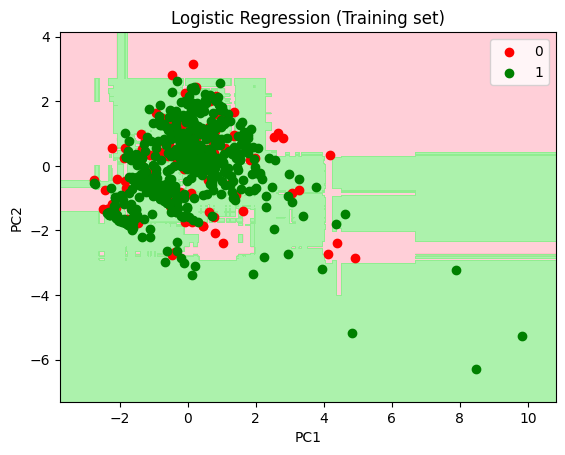

In [55]:
from matplotlib.colors import ListedColormap

# Visualization of training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['pink', 'lightgreen']))  # Use named colors
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(['red', 'green'])(i), label=j)  # Use named colors for scatter
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



====> The plot shows the decision boundary of a Logistic Regression model on the training set after applying PCA for dimensionality reduction. The pink and green regions represent the model's prediction areas for the two classes (0 and 1), and the scatter points (red and green) represent the actual training data points. The model classifies most points correctly, but there are areas where misclassifications occur, as seen by red points in the green region and green points in the pink region.

<ipython-input-57-4d56addb4a70>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


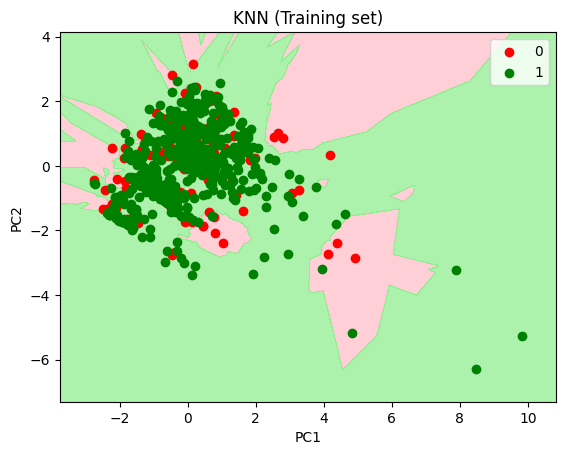

In [57]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Train the KNN classifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)

# Step 2: Visualize the decision boundary for the KNN classifier
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier_knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['pink', 'lightgreen']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(['red', 'green'])(i), label=j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to print the evaluation metrics
def print_evaluation_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model_name} Evaluation Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-' * 50)

# 1. Logistic Regression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)
print_evaluation_metrics(y_test, y_pred_lr, 'Logistic Regression')

# 2. K-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
print_evaluation_metrics(y_test, y_pred_knn, 'KNN')

# 3. Support Vector Machine (SVM)
classifier_svm = SVC(kernel='linear', random_state=0)
classifier_svm.fit(X_train, y_train)
y_pred_svm = classifier_svm.predict(X_test)
print_evaluation_metrics(y_test, y_pred_svm, 'SVM')

# 4. Naive Bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)
print_evaluation_metrics(y_test, y_pred_nb, 'Naive Bayes')

# 5. Decision Tree
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)
print_evaluation_metrics(y_test, y_pred_dt, 'Decision Tree')

# 6. Random Forest
classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)
print_evaluation_metrics(y_test, y_pred_rf, 'Random Forest')


Logistic Regression Evaluation Metrics:
Accuracy: 0.8117
Precision: 0.8117
Recall: 1.0000
F1 Score: 0.8961
--------------------------------------------------
KNN Evaluation Metrics:
Accuracy: 0.7870
Precision: 0.8129
Recall: 0.9582
F1 Score: 0.8796
--------------------------------------------------
SVM Evaluation Metrics:
Accuracy: 0.8117
Precision: 0.8117
Recall: 1.0000
F1 Score: 0.8961
--------------------------------------------------
Naive Bayes Evaluation Metrics:
Accuracy: 0.8117
Precision: 0.8137
Recall: 0.9962
F1 Score: 0.8957
--------------------------------------------------
Decision Tree Evaluation Metrics:
Accuracy: 0.7130
Precision: 0.8220
Recall: 0.8251
F1 Score: 0.8235
--------------------------------------------------
Random Forest Evaluation Metrics:
Accuracy: 0.7716
Precision: 0.8293
Recall: 0.9049
F1 Score: 0.8655
--------------------------------------------------


 ### Conclusion sur les performances des modèles

En analysant les métriques d'évaluation de chacun des modèles, voici les principales observations :

1. **Logistic Regression** et **SVM** :
   - Les deux modèles ont une **exactitude** de 81,17%, avec des **précisions** et **rappels** identiques.
   - Ces modèles montrent un **rappel** de 1, ce qui signifie qu'ils ont détecté correctement tous les cas positifs sans erreur. Cependant, la **précision** n'étant pas parfaite (81,17%), ils ont eu quelques faux positifs.
   - Le **F1-score** de 0,8961 reflète un bon équilibre entre la précision et le rappel.

2. **KNN (K-Nearest Neighbors)** :
   - Ce modèle a une **exactitude** légèrement inférieure (78,70%) comparée à la régression logistique et SVM, mais il montre une **précision** et un **rappel** élevés.
   - Le **rappel** de 95,82% indique que le modèle détecte correctement la plupart des cas positifs, mais la **précision** est un peu inférieure à celle des autres modèles, ce qui signifie qu'il a tendance à prédire un peu trop de positifs par erreur.
   - Le **F1-score** de 0,8796 montre une bonne performance globale, mais légèrement inférieure à celle de la régression logistique.

3. **Naive Bayes** :
   - Ce modèle a des performances très similaires à celles de la régression logistique et SVM, avec une **exactitude** de 81,17%.
   - La **précision** de 81,37% et le **rappel** de 99,62% sont également équilibrés, bien que le rappel soit très légèrement inférieur à 100%, ce qui indique qu'il manque quelques cas positifs.
   - Le **F1-score** de 0,8957 est similaire à celui de la régression logistique, ce qui en fait un modèle performant pour ce problème.

4. **Decision Tree** :
   - Avec une **exactitude** plus faible de 71,30%, ce modèle est moins performant que les autres.
   - Toutefois, la **précision** et le **rappel** autour de 82% montrent qu'il a des performances équilibrées dans la détection des cas positifs, mais il semble générer plus d'erreurs de classification que les autres modèles.
   - Le **F1-score** de 0,8235 indique un modèle relativement bon, mais inférieur aux autres.

5. **Random Forest** :
   - Ce modèle montre une **exactitude** de 77,16%, ce qui le place au-dessus de l'arbre de décision mais en dessous de la régression logistique et SVM.
   - La **précision** de 82,93% et le **rappel** de 90,49% sont bien équilibrés, ce qui signifie que ce modèle détecte correctement la plupart des cas positifs et a une bonne capacité à éviter les faux positifs.
   - Le **F1-score** de 0,8655 reflète une bonne performance globale, mais légèrement inférieure aux modèles de régression logistique, SVM, et Naive Bayes.

### Conclusion générale :
- Les modèles de **régression logistique**, **SVM**, et **Naive Bayes** offrent les meilleures performances globales avec une précision élevée, un rappel parfait ou presque, et un F1-score autour de 0,896, indiquant un excellent équilibre entre précision et rappel.
- Le **KNN** et **Random Forest** ont des performances acceptables mais légèrement inférieures, tandis que l'**arbre de décision** est celui qui a les performances les plus faibles avec une exactitude de 71,30%.
- En termes de compromis entre précision et rappel, les modèles de régression logistique, SVM, et Naive Bayes semblent être les plus adaptés pour ce problème, en particulier si l'objectif est de maximiser le rappel (détection de tous les cas positifs).